# Pre Data Preprocessing - Task [002]

## Purpose

1. Splitting text components for better granularity.
2. Normalizing numerical values to ensure consistency.
3. Removing unnecessary symbols or irrelevant text.

The preprocessing will address these specific attributes in the dataset:
- **Style**
- **Characteristics**
- **Price**
- **Capacity**
- **ABV (Alcohol by Volume)**
- **Vintage**

In [8]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import datetime
import re

# Load the dataset
file_path = '../datasets/WineDataset.csv'
df = pd.read_csv(file_path)

def convert_to_liters(capacity):
    capacity = str(capacity).strip().upper()
    if 'CL' in capacity:  # Centiliters to Liters
        return float(re.sub(r'[^\d.]', '', capacity)) / 100
    elif 'ML' in capacity:  # Milliliters to Liters
        return float(re.sub(r'[^\d.]', '', capacity)) / 1000
    elif 'LITRE' in capacity or 'L' in capacity:  # Liters already
        return float(re.sub(r'[^\d.]', '', capacity))
    elif 'LTR' in capacity or 'L' in capacity:  # Liters already
        return float(re.sub(r'[^\d.]', '', capacity))
    elif 'L' in capacity or 'L' in capacity:  # Liters already
        return float(re.sub(r'[^\d.]', '', capacity))
    else:
        return ''  # Handle any unknown format

def preprocess_data(df):

    numeric_cols = ['Price', 'ABV', 'Capacity']

    df['Capacity'] = df['Capacity'].apply(convert_to_liters)

    if not df.empty:
        for col in numeric_cols:
            if col in df.columns:
                # Remove non-numeric characters and convert to float
                df[col] = df[col].apply(lambda x: re.sub(r'[^\d.]', '', str(x)).strip() if str(x).strip() else np.nan)
                df[col] = pd.to_numeric(df[col], errors='coerce')
                
                if df[col].notnull().any():  # Check if there's valid data for scaling
                    scaler = MinMaxScaler()
                    df[col] = scaler.fit_transform(df[[col]])
                
                df[col] = df[col].round(3)

        # Clean and split the 'Style' column
        # if 'Style' in df.columns:
        #     df['Style'] = (
        #         df['Style']
        #         .str.replace(r'[^\w\s&]', '', regex=True)
        #         .str.split('&')
        #         .apply(lambda x: [item.strip() for item in x] if isinstance(x, list) else x)  # Clean whitespace
        #     )

        #     # This code divides the 'Style' array into several columns, each representing a position in that array
        #     max_len = df['Style'].apply(lambda x: len(x) if isinstance(x, list) else 0).max()

        #     for i in range(1, max_len + 1):
        #         df[f'Style {i}'] = df['Style'].apply(lambda x: x[i-1] if isinstance(x, list) and len(x) >= i else '')

        #     df = df.drop(columns=['Style'])

        # # Clean and split the 'Characteristics' column
        # if 'Characteristics' in df.columns:
        #     df['Characteristics'] = (
        #         df['Characteristics']
        #         .str.replace(r'[^\w\s,]', '', regex=True)
        #         .str.split(',') 
        #         .apply(lambda x: [item.strip() for item in x] if isinstance(x, list) else x)  # Clean whitespace
        #     )
            
        #     # This code divides the 'Characteristics' array into several columns, each representing a position in that array
        #     max_len = df['Characteristics'].apply(lambda x: len(x) if isinstance(x, list) else 0).max()

        #     for i in range(1, max_len + 1):
        #         df[f'Characteristic {i}'] = df['Characteristics'].apply(lambda x: x[i-1] if isinstance(x, list) and len(x) >= i else '')

        #     df = df.drop(columns=['Characteristics'])
            
        # # Clean and normalize the 'Vintage' column
        # if 'Vintage' in df.columns:
        #     current_year = datetime.datetime.now().year

        #     df['Vintage'] = df['Vintage'].apply(
        #         lambda x: current_year if str(x).strip().upper() == 'NV' else (int(re.search(r'\d{4}', str(x)).group(0)) if re.search(r'\d{4}', str(x)) else np.nan)
        #     )

        #     valid_years = df['Vintage'][df['Vintage'] > 1900]
        #     if not valid_years.empty:

        #         min_year = valid_years.min()  
        #         max_year = current_year

        #         # Calculates the vintage value based on the max vintage and the current year
        #         df['Vintage'] = df['Vintage'].apply(
        #             lambda x: max(0, (x - max_year) / (min_year - max_year)) if pd.notna(x) else np.nan
        #         )

        #         # Round the 'Vintage' values to 2 decimal places
        #         df['Vintage'] = df['Vintage'].round(2)

    return df

# Preprocess the dataset
df_cleaned = preprocess_data(df)

# Save or display the cleaned dataset
df_cleaned.to_csv('../datasets/cleaned_wines.csv', index=False)
df_cleaned.head()


,Title,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
0,"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,0.012,0.081,Tempranillo,NaN,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,0.342,NaN,Rich & Juicy,NV,NaN
1,Bread & Butter 'Winemaker's Selection' Chardon...,This really does what it says on the tin. Itâ€...,0.026,0.081,Chardonnay,NaN,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,0.329,California,Rich & Toasty,2021,Napa Valley
2,"Oyster Bay Sauvignon Blanc 2022, Marlborough",Oyster Bay has been an award-winning gold-stan...,0.018,0.081,Sauvignon Blanc,NaN,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,0.316,Marlborough,Crisp & Zesty,2022,NaN
3,Louis Latour MÃ¢con-Lugny 2021/22,Weâ€™ve sold this wine for thirty years â€“ an...,0.031,0.081,Chardonnay,NaN,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,0.329,Burgundy,Ripe & Rounded,2022,Macon
4,Bread & Butter 'Winemaker's Selection' Pinot N...,Bread & Butter is that thing that you can coun...,0.026,0.081,Pinot Noir,NaN,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,0.329,California,Smooth & Mellow,2021,Napa Valley


# Pre Data Preprocessing - Task [92]

## Purpose

1. Merging both updated_wines.csv that has the mean ratings, with the merged_wine_dataset that was the result of Report 2(id:65). Adding the rating of the first dataset to the second.

In [9]:
import pandas as pd
from ftfy import fix_text

file1 = "../datasets/updated_wines.csv"
file2 = "../datasets/merged_wine_dataset.csv"

df1 = pd.read_csv(file1) 
df2 = pd.read_csv(file2) 

#Merge the datasets based on WineName and WineryName
merged_df = df2.merge(df1[['WineName', 'WineryName', 'Ratings']], on=['WineName', 'WineryName'], how='left')

#fix text using ftfy
#fix all the columns except when the column is a float
for col in merged_df.columns:
    if merged_df[col].dtype == 'object': 
        merged_df[col] = merged_df[col].apply(lambda x: fix_text(x) if isinstance(x, str) else x)

#Save the new dataset
output_file = "../datasets/PLNTD_dataset.csv"
merged_df.to_csv(output_file, index=False)

print(f"PLNTD_dataset created and saved to {output_file}")

missing_ratings = merged_df[merged_df['Ratings'].isna()]

#Testing purposes
if not missing_ratings.empty:
    print("WARNING: Some rows in the dataset are missing a rating.")
    print(missing_ratings)
else:
    print("SUCCESS: All rows have a rating.")


PLNTD_dataset created and saved to ../datasets/PLNTD_dataset.csv
SUCCESS: All rows have a rating.


In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

numeric_cols = ['Price', 'ABV', 'Body']

mapping_acidity = {'Low': 1, 'Medium': 2, 'High': 3}
mapping_body = {'Very light-bodied': 1, 'Light-bodied': 2, 'Medium-bodied': 3, 'Full-bodied': 4, 'Very full-bodied': 5}
merged_df['Acidity'] = merged_df['Acidity'].map(mapping_acidity)
merged_df['Body'] = merged_df['Body'].map(mapping_body)

for col in numeric_cols:
    if col in merged_df.columns:
        # Remove non-numeric characters and convert to float
        merged_df[col] = merged_df[col].apply(lambda x: re.sub(r'[^\d.]', '', str(x)).strip() if str(x).strip() else np.nan)
        merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')
#Normalize both body and acidity
scaler = MinMaxScaler()
merged_df[['Acidity', 'Body','Price','ABV','Ratings']] = scaler.fit_transform(merged_df[['Acidity', 'Body', 'Price','ABV','Ratings']])
#Convert to the Saaty scale
#merged_df[['Acidity', 'Body', 'Price', 'ABV', 'Ratings']] = merged_df[['Acidity', 'Body', 'Price', 'ABV', 'Ratings']].apply((lambda x: (x*8+1).round(7)))

#Drop every column besides the 'Ratings', 'ABV', 'Price', 'Acidity', 'Body'
df = merged_df[['WineName','WineryName','ABV', 'Price','Acidity', 'Body','Ratings']]
display(df)

,WineName,WineryName,ABV,Price,Acidity,Body,Ratings
0,Chardonnay,Bread & Butter,0.416667,0.049451,1.0,0.75,0.507353
1,Pinot Noir,Bread & Butter,0.416667,0.049451,1.0,0.50,0.522059
2,Rioja Reserva,Marqués de Riscal,0.500000,0.060440,1.0,0.75,0.617647
3,Cabernet Sauvignon,Bread & Butter,0.416667,0.049451,1.0,0.75,0.522059
4,Gavi,La Raia,0.375000,0.043956,1.0,0.25,0.389706
...,...,...,...,...,...,...,...
217,Torre Muga,Muga,0.500000,0.362637,1.0,0.75,0.852941
218,Marsanne-Roussanne,Trizanne Signature Wines,0.375000,0.043956,1.0,0.50,0.205882
219,Vat 1 Sémillon,Tyrrell's,0.250000,0.181319,1.0,0.50,0.661765
220,Sémillon,Tyrrell's,0.250000,0.181319,1.0,0.50,0.227941


In [11]:

import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' contains pre-processed data
# Columns: 'ABV', 'Price', 'Acidity', 'Body', 'Ratings'

print("Step 1: Constructing the normalized decision matrix (Matrix R)")
decision_matrix = df[['ABV', 'Ratings', 'Body', 'Price', 'Acidity']].values

print("Step 2: Constructing the weighted normalized decision matrix (Matrix V)")
# Weights: ABV, Ratings, Body, Price, Acidity
weights = np.array([0.25, 0.4, 0.15, 0.1, 0.1]) 
weights = weights / sum(weights)  # Normalize weights
weighted_matrix = decision_matrix * weights

print("Step 3: Determining the positive and negative ideal solutions")
ideal_solution = np.max(weighted_matrix, axis=0)  # Max for benefit criteria
negative_ideal_solution = np.min(weighted_matrix, axis=0)  # Min for cost criteria

print("Step 4: Calculating the separation measures")
distances_to_ideal = np.sqrt(np.sum((weighted_matrix - ideal_solution)**2, axis=1))
distances_to_negative = np.sqrt(np.sum((weighted_matrix - negative_ideal_solution)**2, axis=1))

print("Step 5: Calculating the relative distance to the ideal solution")
closeness_coefficient = distances_to_negative / (distances_to_ideal + distances_to_negative)

print("Step 6: Ordering the alternatives")
df['TOPSIS_Score'] = closeness_coefficient
df['Rank'] = df['TOPSIS_Score'].rank(ascending=False)

print("Final Rankings:")
display(df[['WineName', 'WineryName', 'TOPSIS_Score', 'Rank']])


Step 1: Constructing the normalized decision matrix (Matrix R)
Step 2: Constructing the weighted normalized decision matrix (Matrix V)
Step 3: Determining the positive and negative ideal solutions
Step 4: Calculating the separation measures
Step 5: Calculating the relative distance to the ideal solution
Step 6: Ordering the alternatives
Final Rankings:


/var/folders/29/y2wmrq6n6p1c96xj9g5qs5vm0000gn/T/ipykernel_34424/2169051575.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TOPSIS_Score'] = closeness_coefficient
/var/folders/29/y2wmrq6n6p1c96xj9g5qs5vm0000gn/T/ipykernel_34424/2169051575.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rank'] = df['TOPSIS_Score'].rank(ascending=False)


,WineName,WineryName,TOPSIS_Score,Rank
0,Chardonnay,Bread & Butter,0.507187,103.0
1,Pinot Noir,Bread & Butter,0.495846,109.0
2,Rioja Reserva,Marqués de Riscal,0.586836,62.0
3,Cabernet Sauvignon,Bread & Butter,0.515285,97.0
4,Gavi,La Raia,0.393436,187.0
...,...,...,...,...
217,Torre Muga,Muga,0.715956,11.0
218,Marsanne-Roussanne,Trizanne Signature Wines,0.320680,210.0
219,Vat 1 Sémillon,Tyrrell's,0.538994,81.0
220,Sémillon,Tyrrell's,0.307521,213.0


# TOPSIS ALgorithm Analysis- Task [96]

In [12]:
#Top 10 wines
top_wines = df.nsmallest(10, 'Rank')  # Top 10 wines
print(top_wines[['WineName', 'WineryName','TOPSIS_Score','Rank']])
#print(top_wines[['WineName', 'WineryName', 'Ratings', 'ABV','Body','Price','Acidity','TOPSIS_Score','Rank']])

                                WineName       WineryName  TOPSIS_Score  Rank
96                            Clos d'Ora  Gérard Bertrand      0.806864   1.0
67                          Vintage Port          Fonseca      0.777562   2.0
125                                 Ares        Two Hands      0.766137   3.0
97                        Clos du Temple  Gérard Bertrand      0.763063   4.0
72   Amarone della Valpolicella Classico        Allegrini      0.762619   5.0
108                         Purple Angel           Montes      0.747900   6.0
215                           Descendant         Torbreck      0.739375   7.0
153                           Tignanello         Antinori      0.738027   8.0
171                           Paul Sauer         Kanonkop      0.722294   9.0
163                       Viña del Olivo          Contino      0.716939  10.0


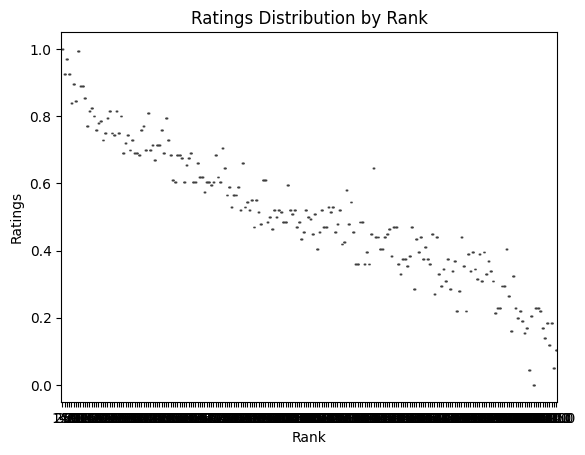

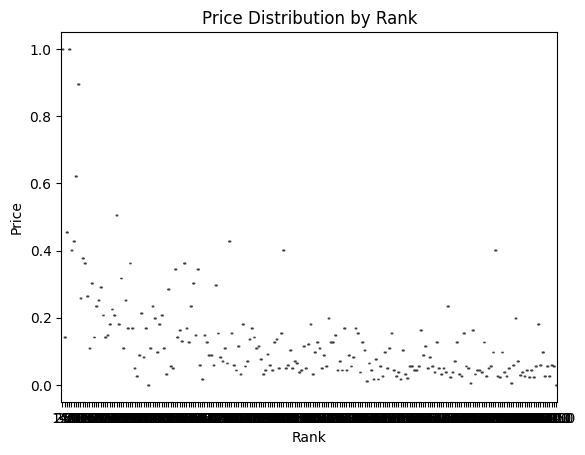

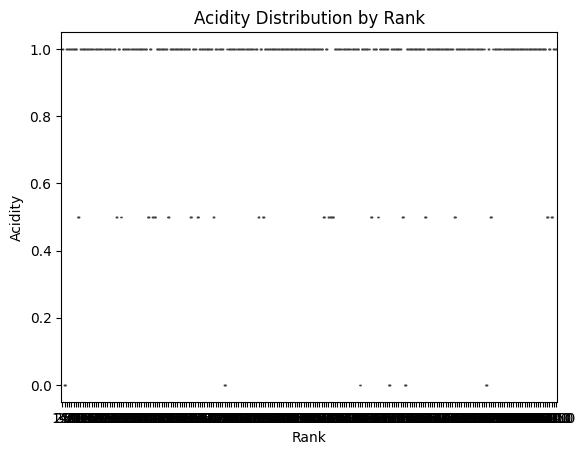

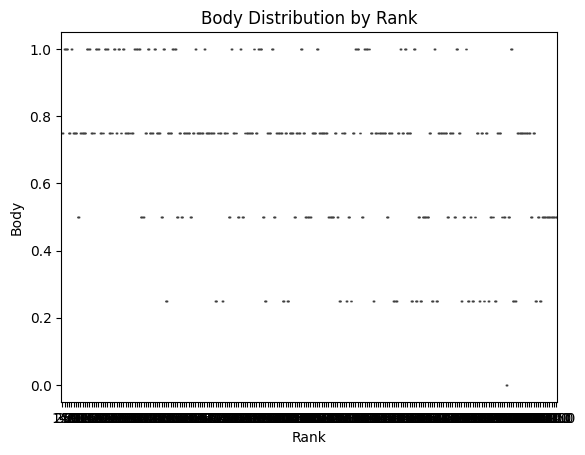

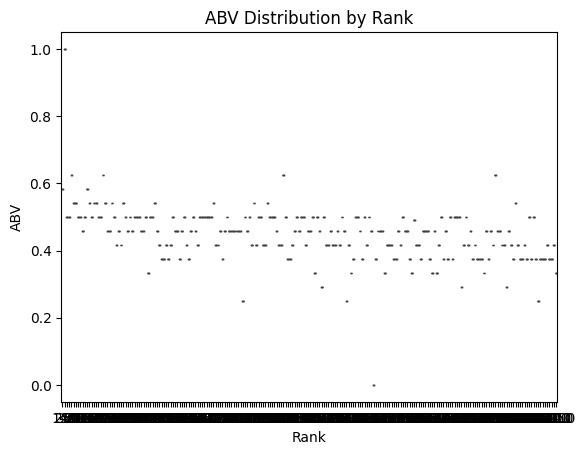

In [13]:

#Importance of every criteria by changing the weights on the criteria,
# we can observe the differences in the results

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='Rank', y='Ratings')
plt.title('Ratings Distribution by Rank')
plt.show()

sns.boxplot(data=df, x='Rank', y='Price')
plt.title('Price Distribution by Rank')
plt.show()

sns.boxplot(data=df, x='Rank', y='Acidity')
plt.title('Acidity Distribution by Rank')
plt.show()

sns.boxplot(data=df, x='Rank', y='Body')
plt.title('Body Distribution by Rank')
plt.show()

sns.boxplot(data=df, x='Rank', y='ABV')
plt.title('ABV Distribution by Rank')
plt.show()


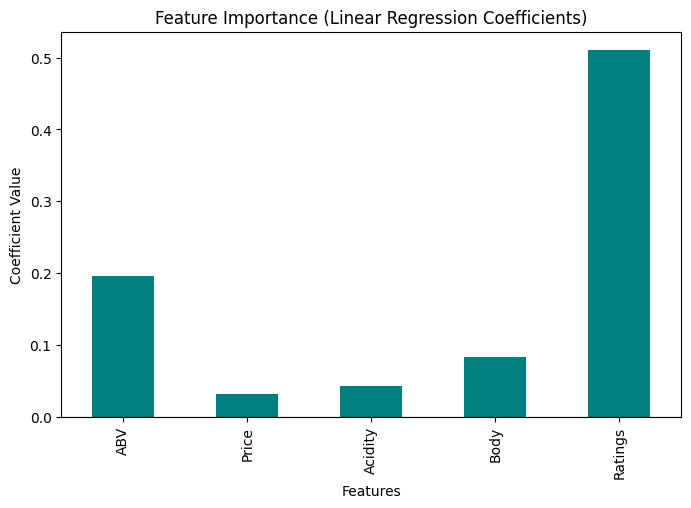

<Figure size 640x480 with 0 Axes>

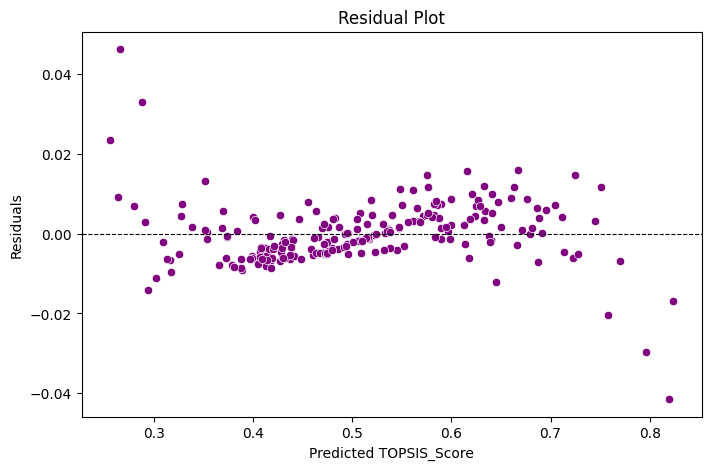

Model Coefficients: ABV        0.196315
Price      0.032059
Acidity    0.042302
Body       0.083259
Ratings    0.510657
dtype: float64 

Intercept: 0.06180000596876223
R-squared: 0.9954
Mean Squared Error: 0.0001


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['ABV', 'Price', 'Acidity', 'Body', 'Ratings']]  # Added Ratings column here
y = df['TOPSIS_Score']
model = LinearRegression().fit(X, y)

coefficients = pd.Series(model.coef_, index=X.columns)
intercept = model.intercept_

plt.figure(figsize=(8, 5))
coefficients.plot(kind='bar', color='teal')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.show()
plt.tight_layout()
plt.show()

predictions = model.predict(X)

print(f"Model Coefficients: {coefficients} \n")
print(f"Intercept: {intercept}")

